In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [49]:
venta = pd.read_csv('../Datasets/Venta.csv', index_col=0)
gasto = pd.read_csv('../Datasets/Gasto.csv', index_col=0)
compra = pd.read_csv('../Datasets/Compra.csv', index_col=0)
localidades = pd.read_csv('../Datasets/Localidades.csv', index_col=0)
proveedores = pd.read_csv('../Datasets/Proveedores.csv', index_col=0, encoding='ansi')
sucursales = pd.read_csv('../Datasets/Sucursales.csv', index_col=0, delimiter=';')
clientes = pd.read_csv('../Datasets/Clientes.csv', index_col=0, delimiter=';')
clientes2 = pd.read_csv('../Datasets/Clientes_v2.csv', index_col=0, delimiter=';')

### Funcion para obtener valores faltantes

In [57]:
def get_missings(df,plot=True,rotation=45,figsize=(10,5),*kwargs):
    labels,values,percent = list(),list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isna().sum():
                labels.append(column)
                values.append(df[column].isna().sum())
                percent.append((df[column].isna().sum() / df.shape[0])*100)
        #Make a dataframe 
        missings=pd.DataFrame({'Colúmnas':labels,'Valores faltantes':values,'PorcentajePerdido':percent}).sort_values(by='PorcentajePerdido',ascending=False)


        if plot:
            plt.figure(figsize=figsize)
            plot = sns.barplot(x=missings.Colúmnas,y=round(missings.PorcentajePerdido, 2), palette = "Blues_r")
            for i in plot.patches:
                plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha = 'center', va = 'baseline', fontsize = 12,
                color = 'black', xytext = (0,1),
                textcoords = 'offset pixels')
            locs, labels = plt.xticks()
            plt.setp(labels, rotation=rotation,size=16)
            plt.xlabel('Colúmnas',size=18)
            plt.ylabel('Porcentaje',size=18)
            plot.set_title(f'Porcentaje de valores perdidos',size=18)

        return missings
    else:
        return False

### Funcion para obtener valores Outliers

In [60]:
def cal_datos(data, campo):
    Q1 = data[campo].quantile(0.25)
    Q3 = data[campo].quantile(0.75)
    #Se calcula el rango intercuartilico IQR.
    IQR = Q3 -Q1
    outliersSup = (Q3 + (1.5*IQR))
    ventaSinOut2 = data[data[campo]<outliersSup]
    sinErrores = ventaSinOut2.shape[0]
    ventaNulos=data[campo].isnull().sum()
    outliers = data.shape[0]-ventaNulos-sinErrores
    #porcentajes para graficar
    porc_ok = round((sinErrores * 100)/data.shape[0], 2)
    porc_nu = round((ventaNulos * 100)/data.shape[0], 2)
    porc_out = round((outliers*100)/data.shape[0], 2)
    #Se cargan los datos para graficar
    datos = ['Valores Nulos','Sin Errores','Outliers'] 
    porcentaje = [porc_nu,porc_ok,porc_out] 
    df = pd.DataFrame({"Datos": datos, 
                    "Porcentaje": porcentaje}) 
    #Se grafica.
    plot = sns.barplot(x='Datos', y="Porcentaje", data=df)
    for i in plot.patches:
                plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha = 'center', va = 'baseline', fontsize = 12,
                color = 'black', xytext = (0,1),
                textcoords = 'offset pixels')
    plot.set_title("Calidad De Los Datos", fontsize = 16)
    plt.show()
    # print("Porcentaje ok: ", porc_ok, 2, "Porcentaje nulos: ", porc_nu, "Porcentaje outliers ", porc_out)

## Analisis de Tabla Venta

In [50]:
venta.head(5)

,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
IdVenta,,,,,,,,,
1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0
2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0
3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0
4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0
5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0


In [51]:
venta.shape

(46180, 9)

In [52]:
venta.isnull().sum()

Fecha              0
Fecha_Entrega      0
IdCanal            0
IdCliente          0
IdSucursal         0
IdEmpleado         0
IdProducto         0
Precio           920
Cantidad         884
dtype: int64

Se registran nulos en Precio y Cantidad.

Pasamos a graficar los porcentajes de los nulos.

,Colúmnas,Valores faltantes,PorcentajePerdido
0,Precio,920,1.992204
1,Cantidad,884,1.914249


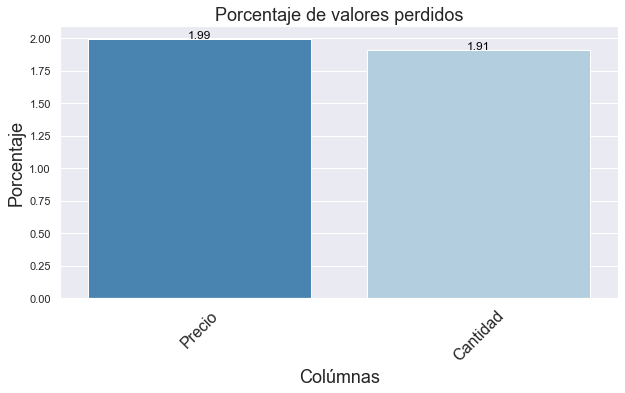

In [59]:
get_missings(venta)

In [9]:
venta.describe().T

,count,mean,std,min,25%,50%,75%,max
IdCanal,46645.0,2.016958,0.743113,1.0,1.0,2.00,3.0,3.0
IdCliente,46645.0,1502.721514,972.521043,1.0,692.0,1360.00,2273.0,3407.0
IdSucursal,46645.0,14.781927,8.878188,1.0,7.0,15.00,23.0,31.0
IdEmpleado,46645.0,2488.720956,960.499762,1011.0,1574.0,2468.00,3433.0,3979.0
IdProducto,46645.0,42901.305585,83.563413,42737.0,42833.0,42902.00,42974.0,43043.0
Precio,45721.0,5835.633585,249801.601585,3.0,438.0,653.62,1789.0,33739200.0
Cantidad,45753.0,2.385395,3.547991,1.0,2.0,2.00,3.0,300.0


Analizamos las features de tipo numericos para poder obtener los outliers.

En la columna Precio podemos ver que a partir de 3815.5 en adelante son outliers.

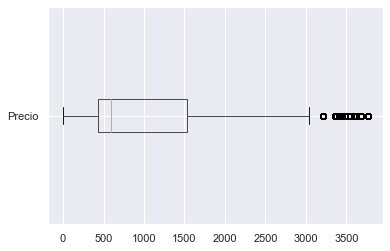

In [11]:
venta_Precio = venta['Precio']<3815.5
venta[venta_Precio].boxplot(column='Precio',vert = False);

Eliminamos los valores outliers de la tabla venta.

In [12]:
ventaSinOut2 = venta[venta_Precio]
sinErrores = ventaSinOut2.shape[0]
sinErrores

43234

In [13]:
porc_ok = (sinErrores*100)/venta.shape[0]

In [14]:
ventaNulos=venta.Precio.isnull().sum()
ventaNulos

924

In [15]:
porc_nu = (ventaNulos*100)/venta.shape[0]

In [16]:
outliers = venta.shape[0]-ventaNulos-sinErrores
outliers

2487

In [17]:
porc_out = (outliers*100)/venta.shape[0]

In [18]:
datos = ['ventaNulos','sinErrores','outliers']
porcentaje = [porc_nu,porc_ok,porc_out]
df = pd.DataFrame({"Datos": datos, 
                   "Porcentaje": porcentaje})

#### Graficamos los porcentajes de los datos nulos, Sin errores y outliers de la feature Precio.

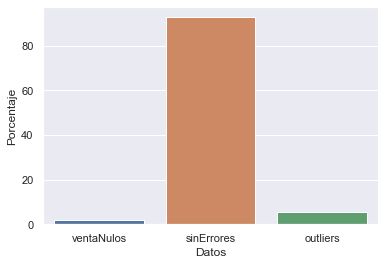

In [19]:
sns.barplot(x='Datos', y="Porcentaje", data=df);

#### Graficamos los porcentajes de los datos nulos, Sin errores y outliers de la feature Cantidad.

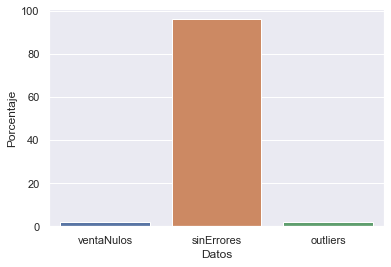

In [20]:
Q1 = venta["Cantidad"].quantile(0.25)
Q3 = venta["Cantidad"].quantile(0.75)
#Se calcula el rango intercuartilico IQR.
IQR = Q3 -Q1
outliersSup = (Q3 + (1.5*IQR)) 
mask = venta["Cantidad"]<outliersSup
ventaSinOut2 = venta[mask]
sinErrores = ventaSinOut2.shape[0]
ventaNulos=venta.Cantidad.isnull().sum()
outliers = venta.shape[0]-ventaNulos-sinErrores
#porcentajes para graficar
porc_ok = (sinErrores*100)/venta.shape[0]
porc_nu = (ventaNulos*100)/venta.shape[0]
porc_out = (outliers*100)/venta.shape[0]
#Se cargan los datos para graficar
datos = ['ventaNulos','sinErrores','outliers'] 
porcentaje = [porc_nu,porc_ok,porc_out] 
df = pd.DataFrame({"Datos": datos, 
                   "Porcentaje": porcentaje}) 
#Se grafica.
sns.barplot(x='Datos', y="Porcentaje", data=df)
plt.show()

<AxesSubplot:>

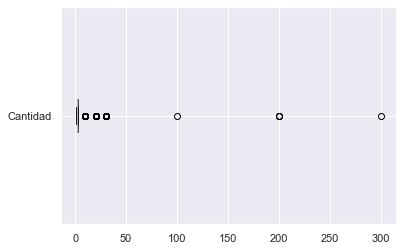

In [21]:
venta_cantidad = pd.DataFrame(venta['Cantidad'])
venta_cantidad.boxplot(vert = False)

### Analisis de Tabla Localidades

In [22]:
localidades.head()

,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,localidad_censal_id,localidad_censal_nombre,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
categoria,,,,,,,,,,,,,
Localidad simple,-35.033073,-60.280620,6021.0,Alberti,INDEC,6021010000,6021010,Alberti,60021.0,Alberti,ALBERTI,6,Buenos Aires
Localidad simple,-34.868119,-60.393971,6021.0,Alberti,INDEC,6021020000,6021020,Coronel Seguí,60021.0,Alberti,CORONEL SEGUI,6,Buenos Aires
Componente de localidad compuesta,-35.068014,-60.402597,6021.0,Alberti,INDEC,6021030000,6021030,Mechita,60021.0,Alberti,MECHITA,6,Buenos Aires
Localidad simple,-35.124382,-60.220061,6021.0,Alberti,INDEC,6021040000,6021040,Pla,60021.0,Alberti,PLA,6,Buenos Aires
Localidad simple,-35.109618,-60.070551,6021.0,Alberti,INDEC,6021050000,6021050,Villa Grisolía,60021.0,Alberti,VILLA GRISOLIA,6,Buenos Aires


Analizamos valores faltantes.

,Features,MissingValues,MissingPercent
0,departamento_id,1,0.024143
1,departamento_nombre,1,0.024143
2,municipio_id,543,13.109609
3,municipio_nombre,494,11.926606


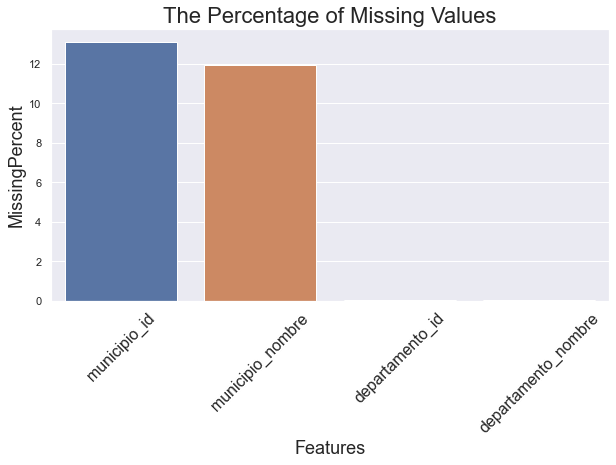

In [23]:
get_missings(localidades).sort_index()

### Analisis de la tabla Gasto.

In [24]:
gasto.head()

,IdSucursal,IdTipoGasto,Fecha,Monto
IdGasto,,,,
1,18,1,2015-01-01,1164.90
2,18,2,2015-01-01,317.02
3,18,3,2015-01-01,118.89
4,18,4,2015-01-01,1174.23
5,1,1,2015-01-01,1104.51


In [25]:
get_missings(gasto)

False

In [26]:
gasto.describe().T

,count,mean,std,min,25%,50%,75%,max
IdSucursal,8640.0,15.600000,8.815649,1.0,8.0000,15.50,23.0000,31.00
IdTipoGasto,8640.0,2.500000,1.118099,1.0,1.7500,2.50,3.2500,4.00
Monto,8640.0,659.919324,448.630839,100.0,255.0225,679.99,1100.5225,1199.88


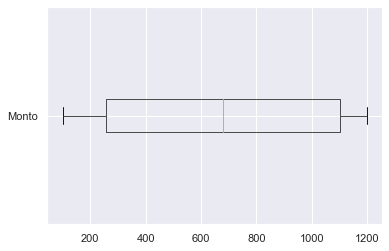

In [27]:
gasto.boxplot(column='Monto',vert = False);

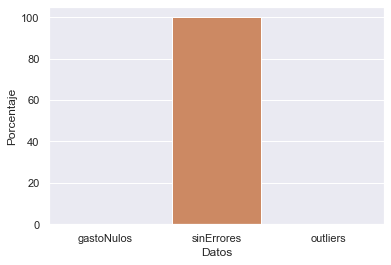

In [28]:
Q1 = gasto["Monto"].quantile(0.25)
Q3 = gasto["Monto"].quantile(0.75)
#Se calcula el rango intercuartilico IQR.
IQR = Q3 -Q1
outliersSup = (Q3 + (1.5*IQR))
mask = gasto["Monto"]<outliersSup
gastoSinOut2 = gasto[mask]
sinErrores = gastoSinOut2.shape[0]
gastoNulos=gasto.Monto.isnull().sum()
outliers = gasto.shape[0]-gastoNulos-sinErrores
#porcentajes para graficar
porc_ok = (sinErrores*100)/gasto.shape[0]
porc_nu = (gastoNulos*100)/gasto.shape[0]
porc_out = (outliers*100)/gasto.shape[0]
#Se cargan los datos para graficar
datos = ['gastoNulos','sinErrores','outliers'] 
porcentaje = [porc_nu,porc_ok,porc_out] 
df = pd.DataFrame({"Datos": datos, 
                   "Porcentaje": porcentaje}) 
#Se grafica.
sns.barplot(x='Datos', y="Porcentaje", data=df)
plt.show()

### Analisis de la Tabla Compra.

In [29]:
compra.head()

,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
IdCompra,,,,,,,,
1,1/30/2015,2015,1,201501,42832,13,560.51,12
2,1/30/2015,2015,1,201501,42833,11,497.58,7
3,1/30/2015,2015,1,201501,42834,1,588.50,6
4,1/30/2015,2015,1,201501,42835,9,567.66,14
5,1/30/2015,2015,1,201501,42839,14,231.31,2


,Features,MissingValues,MissingPercent
0,Precio,367,3.180518


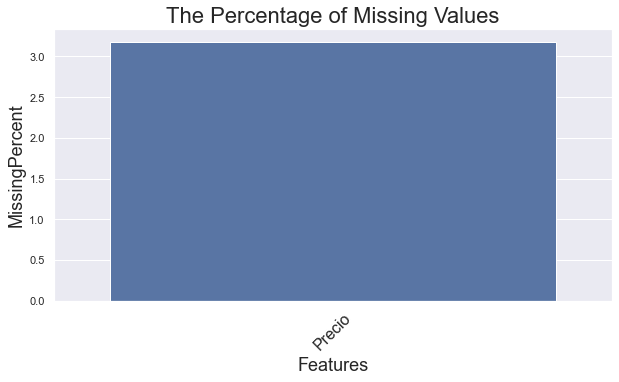

In [30]:
get_missings(compra)

In [31]:
compra.isnull().sum()

Fecha              0
Fecha_Año          0
Fecha_Mes          0
Fecha_Periodo      0
IdProducto         0
Cantidad           0
Precio           367
IdProveedor        0
dtype: int64

In [32]:
compra.describe().T

,count,mean,std,min,25%,50%,75%,max
Fecha_Año,11539.0,2017.671549,1.770288,2015.00,2016.00,2018.000,2019.0000,2020.0
Fecha_Mes,11539.0,4.570500,3.168731,1.00,1.00,4.000,7.0000,12.0
Fecha_Periodo,11539.0,201771.725366,177.830326,201501.00,201605.00,201801.000,201908.0000,202012.0
IdProducto,11539.0,42900.634890,83.539532,42737.00,42832.00,42902.000,42973.0000,43043.0
Cantidad,11539.0,8.826415,6.412074,1.00,4.00,7.000,12.0000,54.0
Precio,11172.0,3613.646813,100663.022573,1.86,306.83,463.485,1260.3225,10445800.0
IdProveedor,11539.0,7.533928,3.770609,1.00,4.00,8.000,11.0000,14.0


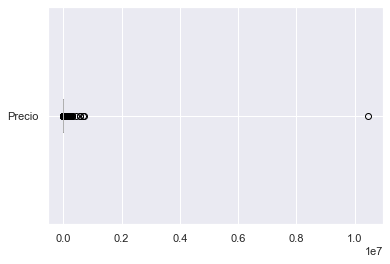

In [33]:
compra.boxplot(column='Precio',vert = False);

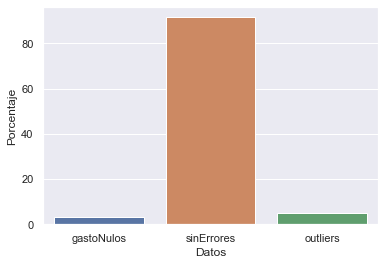

In [34]:
Q1 = compra["Precio"].quantile(0.25)
Q3 = compra["Precio"].quantile(0.75)
#Se calcula el rango intercuartilico IQR.
IQR = Q3 -Q1
outliersSup = (Q3 + (1.5*IQR))
mask = compra["Precio"]<outliersSup
gastoSinOut2 = compra[mask]
sinErrores = gastoSinOut2.shape[0]
gastoNulos=compra.Precio.isnull().sum()
outliers = compra.shape[0]-gastoNulos-sinErrores
#porcentajes para graficar
porc_ok = (sinErrores*100)/compra.shape[0]
porc_nu = (gastoNulos*100)/compra.shape[0]
porc_out = (outliers*100)/compra.shape[0]
#Se cargan los datos para graficar
datos = ['gastoNulos','sinErrores','outliers'] 
porcentaje = [porc_nu,porc_ok,porc_out] 
df = pd.DataFrame({"Datos": datos, 
                   "Porcentaje": porcentaje}) 
#Se grafica.
sns.barplot(x='Datos', y="Porcentaje", data=df)
plt.show()

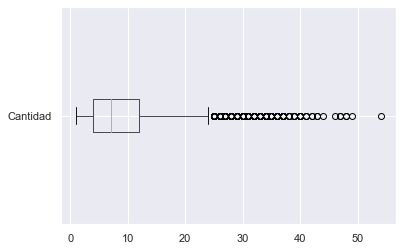

In [35]:
compra.boxplot(column='Cantidad',vert = False);

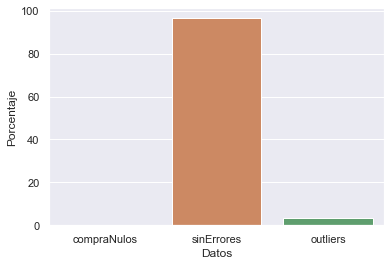

In [36]:
Q1 = compra["Cantidad"].quantile(0.25)
Q3 = compra["Cantidad"].quantile(0.75)
#Se calcula el rango intercuartilico IQR.
IQR = Q3 -Q1
outliersSup = (Q3 + (1.5*IQR))
mask = compra["Cantidad"]<outliersSup
compraSinOut2 = compra[mask]
sinErrores = compraSinOut2.shape[0]
compraNulos=compra.Cantidad.isnull().sum()
outliers = compra.shape[0]-compraNulos-sinErrores
#porcentajes para graficar
porc_ok = (sinErrores*100)/compra.shape[0]
porc_nu = (compraNulos*100)/compra.shape[0]
porc_out = (outliers*100)/compra.shape[0]
#Se cargan los datos para graficar
datos = ['compraNulos','sinErrores','outliers'] 
porcentaje = [porc_nu,porc_ok,porc_out] 
df = pd.DataFrame({"Datos": datos, 
                   "Porcentaje": porcentaje}) 
#Se grafica.
sns.barplot(x='Datos', y="Porcentaje", data=df)
plt.show()

### Analisis de Tabla Proveedores

In [37]:
proveedores.head()

,Nombre,Address,City,State,Country,departamen
IDProveedor,,,,,,
1,NaN,BEREGUESTEIN 36,AVELLANEDA,BUENOS AIRES,ARGENTINA,AVELLANEDA
2,San Cirano,ALBERTI 965,CORONEL BRANDSEN,BUENOS AIRES,ARGENTINA,BRANDSEN
3,Bell S.A.,MORENO 331,CAMPANA,BUENOS AIRES,ARGENTINA,CAMPANA
4,Rivero Insumos,PTE. PERON 3872,VALENTIN ALSINA,BUENOS AIRES,ARGENTINA,LANUS
5,Laprida Computacion,AVDA. PEDRO PEREYRA 1339,LAPRIDA,BUENOS AIRES,ARGENTINA,LAPRIDA


In [38]:
proveedores.isnull().sum()

Nombre        2
Address       0
City          0
State         0
Country       0
departamen    0
dtype: int64

,Features,MissingValues,MissingPercent
0,Nombre,2,14.285714


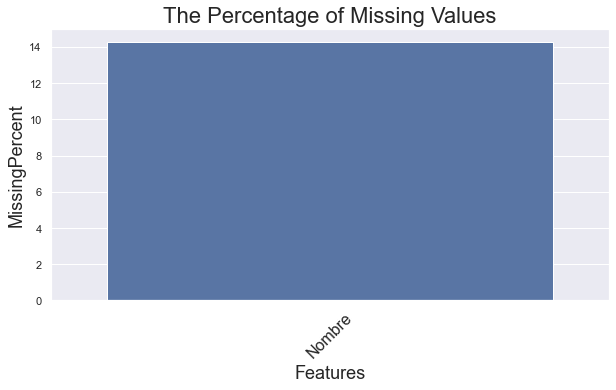

In [39]:
get_missings(proveedores)

### Analisis de Tabla Clientes

In [40]:
clientes.head()

,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
ID,,,,,,,,,
1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,"-58,81850307","-34,30997088",NaN
2,Buenos Aires,ANA SAPRIZA,PUEYRREDON Y DUPUY RUTA3 KM 52.500 S/N BÂº LO...,49-7578,61,SANTA ROSA,"-58,73073751","-34,93908311",NaN
3,Buenos Aires,FERNANDO LUIS SARALEGUI,CALDERON DE LA BARCA 498,49-3435,15,TORRES,"-59,12794068","-34,43082199",NaN
4,Buenos Aires,MANUELA SARASOLA,"RUTA 36 KM 45,500 S/N EL PELIGRO",49-2883,29,RUTA SOL,"-58,14393954","-34,92052706",NaN
5,Buenos Aires,MARIO RAÚL SARASUA,492 Y 186 S/N COLONIA URQUIZA,491-4608,34,JOSE MELCHOR ROMERO,"-58,089381","-34,9444471",NaN


In [41]:
clientes.isnull().sum()

Provincia              25
Nombre_y_Apellido      24
Domicilio              42
Telefono               35
Edad                    0
Localidad              25
X                      56
Y                      54
col10                2672
dtype: int64

,Features,MissingValues,MissingPercent
7,col10,2672,100.000000
5,X,56,2.095808
6,Y,54,2.020958
2,Domicilio,42,1.571856
3,Telefono,35,1.309880
0,Provincia,25,0.935629
4,Localidad,25,0.935629
1,Nombre_y_Apellido,24,0.898204


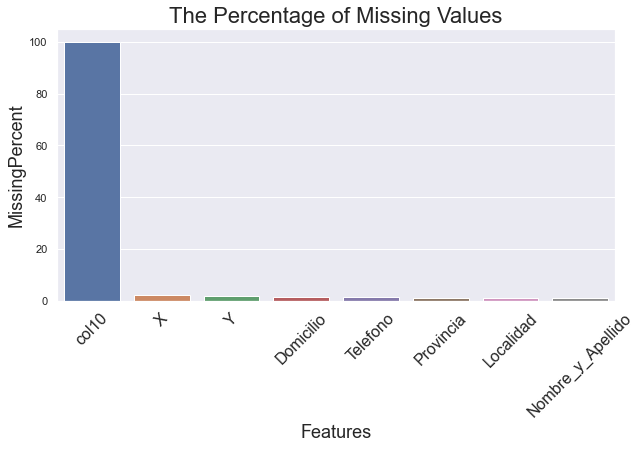

In [42]:
get_missings(clientes)

In [43]:
clientes_sincol = clientes.drop(columns='col10')

,Features,MissingValues,MissingPercent
5,X,56,2.095808
6,Y,54,2.020958
2,Domicilio,42,1.571856
3,Telefono,35,1.309880
0,Provincia,25,0.935629
4,Localidad,25,0.935629
1,Nombre_y_Apellido,24,0.898204


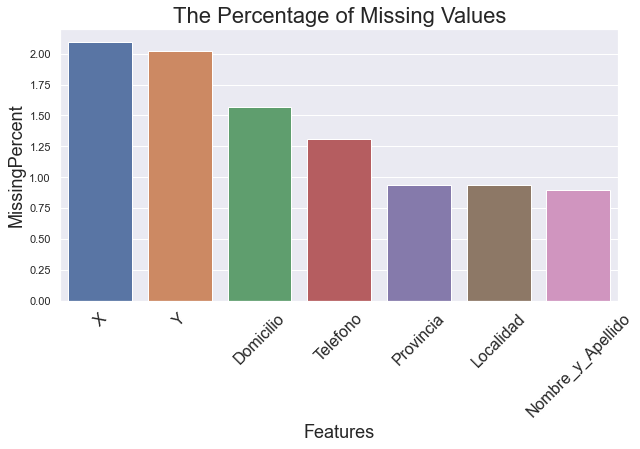

In [44]:
get_missings(clientes_sincol)

,Features,MissingValues,MissingPercent
7,col10,735,100.000000
3,Telefono,55,7.482993
1,Nombre_y_Apellido,22,2.993197
4,Localidad,7,0.952381
0,Provincia,6,0.816327
2,Domicilio,6,0.816327
5,X,6,0.816327
6,Y,6,0.816327


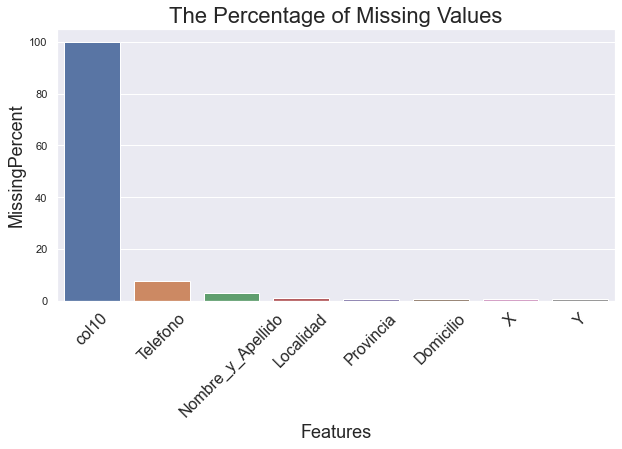

In [45]:
get_missings(clientes2)

In [46]:
clientes2_sincol = clientes2.drop(columns='col10')

,Features,MissingValues,MissingPercent
3,Telefono,55,7.482993
1,Nombre_y_Apellido,22,2.993197
4,Localidad,7,0.952381
0,Provincia,6,0.816327
2,Domicilio,6,0.816327
5,X,6,0.816327
6,Y,6,0.816327


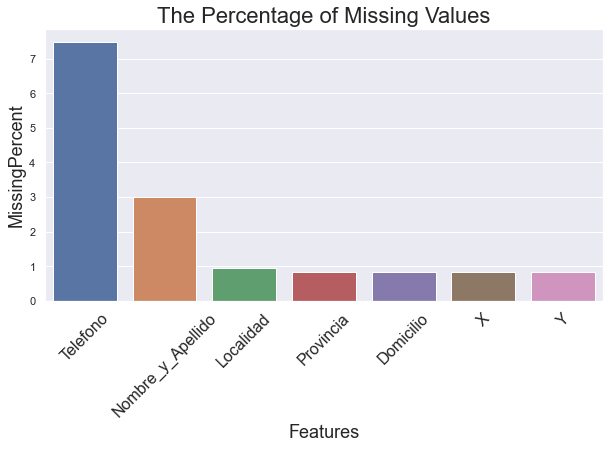

In [47]:
get_missings(clientes2_sincol)